In [42]:
import os
import cv2
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from sklearn.model_selection import train_test_split

In [3]:
!git clone https://github.com/toelt-llc/HSLU-Computer-Vision-Lab-Student-Version

Cloning into 'HSLU-Computer-Vision-Lab-Student-Version'...
remote: Enumerating objects: 5032, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 5032 (delta 0), reused 0 (delta 0), pack-reused 5029
Receiving objects: 100% (5032/5032), 990.30 MiB | 28.39 MiB/s, done.
Resolving deltas: 100% (147/147), done.
Updating files: 100% (5017/5017), done.


In [4]:
# Walk through Kather_texture directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/HSLU-Computer-Vision-Lab-Student-Version/data/Kather_texture_2016_image_tiles_5000/"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 8 directories and 1 images in '/content/HSLU-Computer-Vision-Lab-Student-Version/data/Kather_texture_2016_image_tiles_5000/'.
There are 0 directories and 625 images in '/content/HSLU-Computer-Vision-Lab-Student-Version/data/Kather_texture_2016_image_tiles_5000/08_EMPTY'.
There are 0 directories and 625 images in '/content/HSLU-Computer-Vision-Lab-Student-Version/data/Kather_texture_2016_image_tiles_5000/06_MUCOSA'.
There are 0 directories and 625 images in '/content/HSLU-Computer-Vision-Lab-Student-Version/data/Kather_texture_2016_image_tiles_5000/04_LYMPHO'.
There are 0 directories and 625 images in '/content/HSLU-Computer-Vision-Lab-Student-Version/data/Kather_texture_2016_image_tiles_5000/03_COMPLEX'.
There are 0 directories and 625 images in '/content/HSLU-Computer-Vision-Lab-Student-Version/data/Kather_texture_2016_image_tiles_5000/01_TUMOR'.
There are 0 directories and 625 images in '/content/HSLU-Computer-Vision-Lab-Student-Version/data/Kather_texture_2016_image_tiles_

In [5]:
base_dir = '/content/HSLU-Computer-Vision-Lab-Student-Version/data/Kather_texture_2016_image_tiles_5000'
df = pd.DataFrame({'path': glob(os.path.join(base_dir, '*','*.tif'))})

In [6]:
df['file_id'] = df['path'].map(lambda x: os.path.splitext(os.path.basename(x))[0])
df['cell_type'] = df['path'].map(lambda x: os.path.basename(os.path.dirname(x)))
df['cell_type_idx'] = df['cell_type'].map(lambda x: int(x. split('_')[0]))
df['cell_type'] = df['cell_type'].map(lambda x: x.split('_')[1])
df['full_image_name'] = df['file_id'].map(lambda x: x.split('_ Row')[0])
df['full_image_row'] = df['file_id'].map(lambda x: int(x.split('_')[-3]))
df['full_image_col'] = df['file_id'].map(lambda x: int(x.split('_')[-1]))
df.head()

,path,file_id,cell_type,cell_type_idx,full_image_name,full_image_row,full_image_col
0,/content/HSLU-Computer-Vision-Lab-Student-Vers...,11460_CRC-Prim-HE-06_005.tif_Row_3151_Col_5551,EMPTY,8,11460_CRC-Prim-HE-06_005.tif_Row_3151_Col_5551,3151,5551
1,/content/HSLU-Computer-Vision-Lab-Student-Vers...,112BC_CRC-Prim-HE-06_005.tif_Row_751_Col_6451,EMPTY,8,112BC_CRC-Prim-HE-06_005.tif_Row_751_Col_6451,751,6451
2,/content/HSLU-Computer-Vision-Lab-Student-Vers...,13B7F_CRC-Prim-HE-06_005.tif_Row_5401_Col_1501,EMPTY,8,13B7F_CRC-Prim-HE-06_005.tif_Row_5401_Col_1501,5401,1501
3,/content/HSLU-Computer-Vision-Lab-Student-Vers...,11D15_CRC-Prim-HE-06_005.tif_Row_3601_Col_1351,EMPTY,8,11D15_CRC-Prim-HE-06_005.tif_Row_3601_Col_1351,3601,1351
4,/content/HSLU-Computer-Vision-Lab-Student-Vers...,104E8_CRC-Prim-HE-06_005.tif_Row_3601_Col_751,EMPTY,8,104E8_CRC-Prim-HE-06_005.tif_Row_3601_Col_751,3601,751


In [7]:
df['image'] = df['path'].map(plt.imread)

In [8]:
df['cell_type'].unique()

array(['EMPTY', 'MUCOSA', 'LYMPHO', 'COMPLEX', 'TUMOR', 'ADIPOSE',
       'DEBRIS', 'STROMA'], dtype=object)

In [9]:
df.shape

(5000, 8)

In [10]:
df['cell_type'].value_counts()

EMPTY      625
MUCOSA     625
LYMPHO     625
COMPLEX    625
TUMOR      625
ADIPOSE    625
DEBRIS     625
STROMA     625
Name: cell_type, dtype: int64

In [11]:
df['full_image_name'][df.duplicated('full_image_name')]

Series([], Name: full_image_name, dtype: object)

In [12]:
df['full_image_name'].nunique()

5000

In [13]:
np.random.seed(42)
cell_types = df['cell_type'].unique()

sample_list = []
for cell in cell_types:
  rand_sample = np.random.choice(625, 5)
  for sample in rand_sample:
    cell_df = df[df['cell_type'] == cell].iloc[sample,:]
    cell_type = cell_df['cell_type']
    image = cell_df['image']
    sample_list.append({'cell_type':cell_type, 'image':image})

viz_df = pd.DataFrame(sample_list)
viz_df

,cell_type,image
0,EMPTY,"[[[240, 242, 241], [240, 242, 241], [240, 242,..."
1,EMPTY,"[[[243, 245, 244], [243, 245, 244], [243, 245,..."
2,EMPTY,"[[[240, 240, 240], [241, 241, 241], [241, 241,..."
3,EMPTY,"[[[239, 240, 242], [239, 240, 242], [239, 240,..."
4,EMPTY,"[[[240, 236, 237], [240, 236, 237], [226, 231,..."
5,MUCOSA,"[[[144, 77, 131], [142, 75, 129], [153, 85, 14..."
6,MUCOSA,"[[[126, 72, 122], [126, 68, 119], [119, 61, 11..."
7,MUCOSA,"[[[183, 144, 183], [152, 113, 152], [148, 96, ..."
8,MUCOSA,"[[[110, 66, 119], [117, 68, 124], [124, 75, 13..."
9,MUCOSA,"[[[201, 181, 208], [205, 183, 206], [195, 173,..."


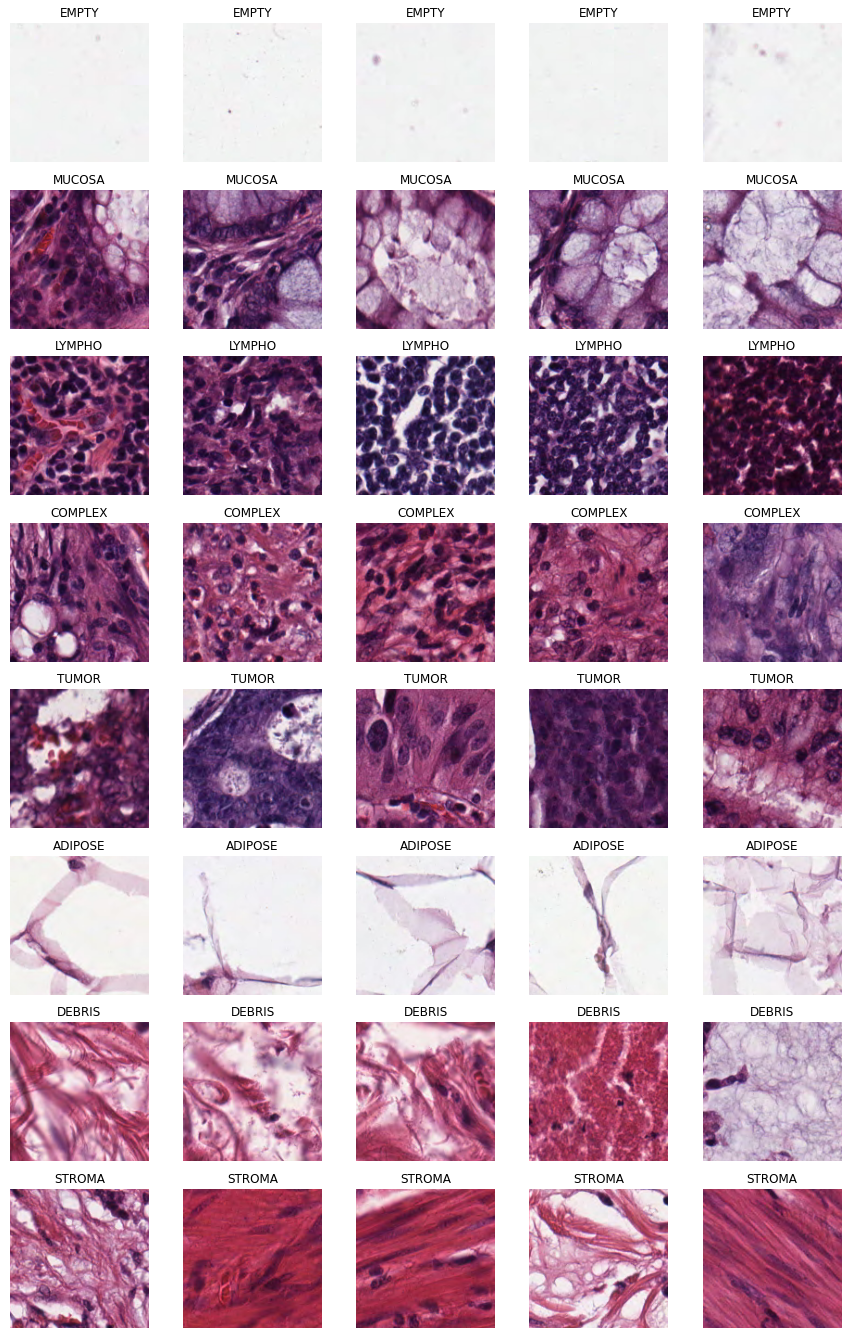

In [14]:
rows = len(cell_types)
columns = 5

fig, ax = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*3, rows*3))
for row in range(rows):
  for col in range(columns):
    ax[row, col].axis('off')

for num in range(40):

  fig.add_subplot(rows, columns, num+1)

  plt.imshow(viz_df['image'][num])
  plt.axis('off')
  plt.title(viz_df['cell_type'][num])

In [15]:
# shuffle samples
rows = df.index.values
random.shuffle(rows)
df=df.reindex(rows)
df.sort_index(inplace=True)

In [16]:
df_label = pd.get_dummies(df['cell_type'])
print(df_label)

      ADIPOSE  COMPLEX  DEBRIS  EMPTY  LYMPHO  MUCOSA  STROMA  TUMOR
0           0        0       0      0       0       0       0      1
1           0        0       0      0       0       1       0      0
2           0        0       1      0       0       0       0      0
3           0        0       0      0       1       0       0      0
4           0        0       0      0       1       0       0      0
...       ...      ...     ...    ...     ...     ...     ...    ...
4995        0        0       0      1       0       0       0      0
4996        0        0       0      0       0       1       0      0
4997        0        0       1      0       0       0       0      0
4998        0        0       0      0       0       0       0      1
4999        0        0       0      0       0       1       0      0

[5000 rows x 8 columns]


In [17]:
data=np.array(df['image'].tolist())

In [18]:

x, x_test, y, y_test = train_test_split(data, df_label, test_size=0.2,train_size=0.8)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.25,train_size =0.75)


In [19]:
print('1- Training set:', x_train.shape, y_train.shape)
print('2- Validation set:', x_val.shape, y_val.shape)
print('3- Testing set:', x_test.shape, y_test.shape)

1- Training set: (3000, 150, 150, 3) (3000, 8)
2- Validation set: (1000, 150, 150, 3) (1000, 8)
3- Testing set: (1000, 150, 150, 3) (1000, 8)


In [20]:
# split data based on lables:
df_dic = {cell: pd.DataFrame() for cell in cell_types}

for key in df_dic.keys():
  df_dic[key] = df[df.cell_type == key][:]
  df_dic[key].reset_index(drop=True, inplace=True)

In [113]:
list_tumor = list(df_dic['MUCOSA']['image'])
sum_tumor = np.round(np.sum(list_tumor, axis=0) / len(list_tumor))
sum_tumor = sum_tumor.astype(int)

In [114]:
sum_tumor.shape

(150, 150, 3)

In [ ]:
#sum_tumor

In [ ]:
#plot = plt.imshow(sum_tumor)

In [117]:
sq_tumor = np.square(sum_tumor) 
sq_tumor = ((sq_tumor/ np.max(sq_tumor))*255).astype(int)

In [118]:
#sq_tumor

In [ ]:
#plot_sq = plt.imshow(sq_tumor)

In [120]:
# to the power of 4: 
pw_mat = np.full((150, 150, 3), 100)
pw_tumor = np.power(sum_tumor, pw_mat)
print(np.max(pw_tumor))
pw_tumor = ((pw_tumor/ np.max(pw_tumor))*255).astype(int)


8197919816663020033


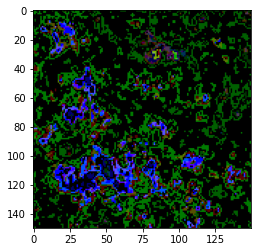

In [147]:
plot_pw = plt.imshow(pw_tumor)

In [163]:
def avg_img(cell_type, power=20):

  """Get an average picture of a category, contrasts amplified."""

  list_tumor = list(df_dic[cell_type]['image'])
  sum_tumor = np.sum(list_tumor, axis=0) / len(list_tumor)
  pw_mat = np.full((150, 150, 3), power)
  pw_tumor = np.power(sum_tumor, pw_mat)
  #print(pw_tumor)
  pw_tumor = pw_tumor / np.max(pw_tumor)
  return(pw_tumor)

In [ ]:
tum = avg_img('TUMOR')
#plot_pw = plt.imshow(tum)

tum


In [170]:
df_avg = pd.DataFrame()
typ = []
img = []

for i in cell_types:
  typ.append(i)
  img.append(avg_img(i))

df_avg['cell_type'] = typ
df_avg['image'] = img


#df_avg = df_avg[df_avg['cell_type'] != 'EMPTY']
df_avg.head(8)


,cell_type,image
0,EMPTY,"[[[0.937265777693935, 0.969748392130313, 0.963..."
1,MUCOSA,"[[[0.2631741078779808, 5.7926618487456956e-05,..."
2,LYMPHO,"[[[0.3667367474678757, 4.592588736001228e-06, ..."
3,COMPLEX,"[[[0.44492876067079845, 7.286824839169167e-07,..."
4,TUMOR,"[[[0.5243846560287257, 2.0944197122682597e-06,..."
5,ADIPOSE,"[[[0.8139018472875282, 0.45185747598365744, 0...."
6,DEBRIS,"[[[0.5155232126945101, 0.00010130553472670708,..."
7,STROMA,"[[[0.6283135018107394, 4.9634241664212705e-06,..."


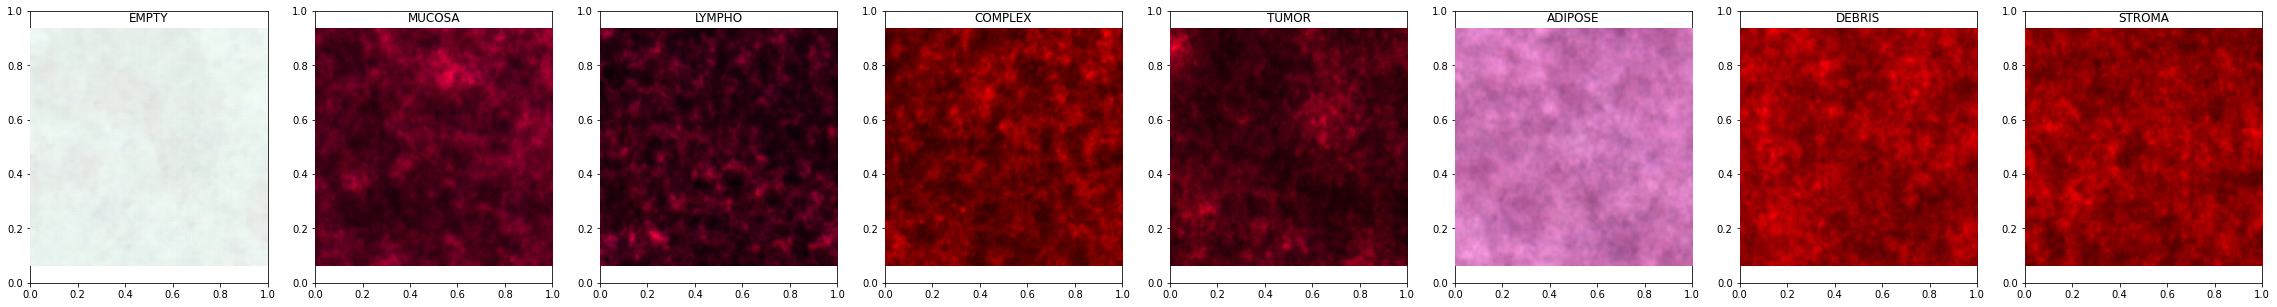

In [175]:
rows = 1
columns = 8

fig, ax = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*5, rows*5))

for num in range(8):

  fig.add_subplot(rows, columns, num+1)

  plt.imshow(df_avg['image'][num])
  plt.axis('off')
  plt.title(df_avg['cell_type'][num])

In [166]:
df_avg['image']

1    [[[0.2631741078779808, 5.7926618487456956e-05,...
2    [[[0.3667367474678757, 4.592588736001228e-06, ...
3    [[[0.44492876067079845, 7.286824839169167e-07,...
4    [[[0.5243846560287257, 2.0944197122682597e-06,...
5    [[[0.8139018472875282, 0.45185747598365744, 0....
6    [[[0.5155232126945101, 0.00010130553472670708,...
7    [[[0.6283135018107394, 4.9634241664212705e-06,...
Name: image, dtype: object